In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#load in ellipse data
import csv

train_X = []
train_Y = []
train_Labels = []

# put X-coordinates into numpy array train_X
with open('training1X.csv') as training1X_csv:
  reader = csv.reader(training1X_csv)#, delimiter=' ', quotechar='|')
  for row in reader:
    train_X = np.append(train_X, row)
train_X = np.reshape(train_X, (30,500)) # will need to change shape if using other data

# put Y-coordinates into numpy array train_Y
with open('training1Y.csv') as training1Y_csv:
  reader = csv.reader(training1Y_csv)#, delimiter=' ', quotechar='|')
  for row in reader:
    train_Y = np.append(train_Y, row)
train_Y = np.reshape(train_Y, (30,500)) # will need to change shape if using other data

# put labels into numpy array train_labels
with open('training1Labels.csv') as training1Labels_csv:
  reader = csv.reader(training1Labels_csv)#, delimiter=' ', quotechar='|')
  for row in reader:
    train_Labels = np.append(train_Labels, row)
train_Labels = np.reshape(train_Labels, (500,6), order = 'F') # will need to change shape if using other data

n,m = (train_X.T).shape #(n,m) = (500,30)
X = train_X[:,0] # X [30,500]
y = train_Y[:,0]
X = np.reshape(X, (30,1))
y = np.reshape(y, (30,1))
X = X.astype(float)
y = y.astype(float)


(30, 1)
(30, 1)


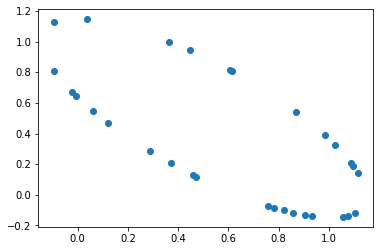

In [47]:
# 1d data with five samples
print(X.shape)
n = X.shape[0]
print(y.shape)
# Data visualization
plt.figure()
plt.scatter(X[:], y[:])

In [41]:
# Training kernel regression (== finding alpha)
# Play with different sigma values
sigma = 0.5 # Try 2, 0.05 too
lam = 0.01 
K_matrix = np.zeros((n,n))

for i in range(n):
  for j in range(i, n):
    K_matrix[i,j] = np.exp(-1 * (X[i,:] - X[j,:])**2 / (2 * sigma**2))
    K_matrix[j,i] = K_matrix[i,j]

alpha = np.linalg.inv(K_matrix + lam) @ y

In [42]:
# Inference code -- now x_input (new data) is given, we do inference
x_input = np.linspace(-3, 3, 101)
y_hats = np.zeros((n, x_input.shape[0]))
for i in range(n):
  y_hats[i,:] = np.exp(- (x_input - X[i,:])**2 / (2 * sigma**2))

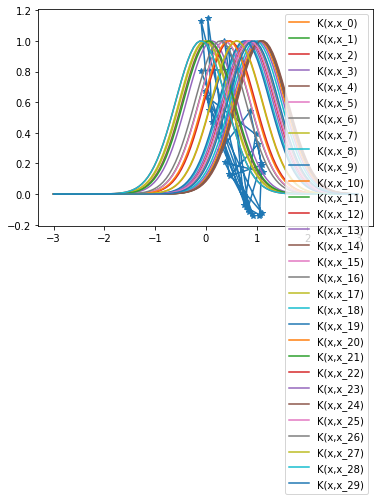

In [43]:
# Visualization of each kernel function located at each x_i (before alpha scaling)
plt.figure()
plt.plot(X, y, "-*")
for i in range(n):
  plt.plot(x_input, y_hats[i,:], label="K(x,x_%d)"%i)
plt.legend()

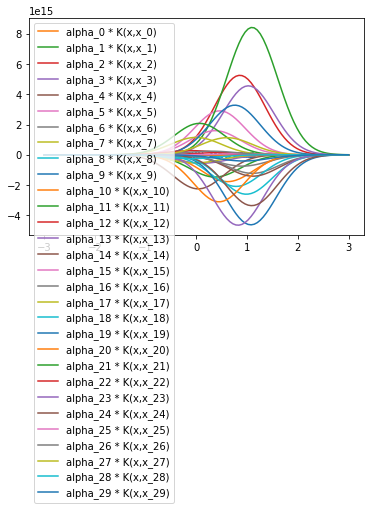

In [44]:
# Visualization of each kernel function located at each x_i (with alpha scaling)
plt.figure()
plt.plot(X, y, "-*")
for i in range(n):
  plt.plot(x_input, alpha[i] * y_hats[i,:], label="alpha_%d * K(x,x_%d)"%(i,i))
plt.legend()

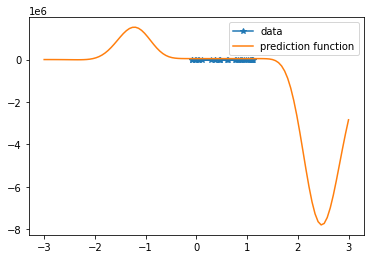

In [45]:
# Visualization of the sum of weighted kernel functions
plt.figure()
plt.plot(X, y, "-*", label="data")
plt.plot(x_input, np.sum(alpha.T @ y_hats, axis=0), label="prediction function")
plt.legend()